In [1]:
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣤⣤⡀⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣿⣿⣿⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢿⣿⣿⠟⠀⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠻⣿⣷⣄⠀⠀⠀⠀⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⣶⣿⡆⠀⠀⠉⠉⠀⠈⣶⡆⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⣿⣿⣿⡇⠀⠀⠀⠀⠀⠀⢻⣷⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣼⣿⡿⠟⠀⠀⠀⠀⠀⠀⠀⣸⣿⡄
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣿⠃⠀⠀⠀⠀⠀⠀⠀⠀⠙⣿⣷
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠛⠃⠀⠀⠀⠀⠀⠀⠀⠀⢰⣾⣿⠏
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⣧⡔⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠟⠁⠀
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣿⠇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
# Ah shit, here we go again.
# Sets up widgets to use
import ipywidgets as widgets
from IPython.display import display

# Lets you know if code was successful or not
try:
    
    # < Grabs necessary imports >
    import os
    import gc
    import json
    import math
    import random
    import numpy as np
    import pandas as pd
    from PIL import Image
    import tensorflow as tf
    from tensorflow import keras
    import imgaug.augmenters as iaa
    from tensorflow.keras import layers
    from matplotlib import pyplot as plt
    from tensorflow.keras import backend as k
    from imgaug.augmentables.kps import Keypoint
    from tensorflow.keras.callbacks import Callback
    from sklearn.model_selection import train_test_split
    from imgaug.augmentables.kps import KeypointsOnImage

# ============================================================= #
    success = widgets.Valid(
        value=True,
        description="Success!",
    )
    display(success)
except Exception as e:
    failure = widgets.Valid(
        value=False,
        description="Failure!",
    )
    display(failure)
    print(e)
# ============================================================= #

Valid(value=True, description='Success!')

In [2]:
#   ,-.       _,---._ __  / \
#  /  )    .-'       `./ /   \
# (  (   ,'            `/    /|
#  \  `-"             \'\   / |
#   `.              ,  \ \ /  |
#    /`.          ,'-`----Y   |
#   (            ;        |   '
#   |  ,-.    ,-'  Connor |  /
#   |  | (   |   Contursi | /
#   )  |  \  `.___________|/
#   `--'   `--'

# Lets you know if code was successful or not
try:

    # Dataset definitions
    image_size = 160
    batch_volume = 8
    EPOCHS = 25
    keypoints_quantity = 12 * 2

    # Paths for data sources
    BASE_DIR = os.path.dirname(os.path.abspath("__file__"))
    os.chdir(BASE_DIR)  # Sets root directory
    JSON = "./annotations.json"
    image_path = "./source_images"

    # Load dataset annotations from JSON
    with open(JSON) as infile:
        json_data = json.load(infile)

    # Creates dictionary using image paths
    JSON_dictionary = {j["img_paths"]: j for j in json_data}

    # labels:
    #     "r ankle"
    #     "r knee"
    #     "r hip"
    #     "l hip"
    #     "l knee"
    #     "l ankle"
    #     "pelvis"
    #     "r wrist"
    #     "r elbow"
    #     "r shoulder"
    #     "l shoulder"
    #     "l eblow"
    #     "l wrist"

# ============================================================= #
    success = widgets.Valid(
        value=True,
        description="Success!",
    )
    display(success)
except Exception as e:
    failure = widgets.Valid(
        value=False,
        description="Failure!",
    )
    display(failure)
    print(e)
# ============================================================= #

Valid(value=True, description='Success!')

In [3]:
# Utility for reading an image and for getting its annotations.
def retrieve_current_image(name):
    data = JSON_dictionary[name]
    keypoints = data["joint_self"]

    # Removes annotations that aren't needed
    # : pelvis, thorax, upper_neck, and head_top

    counts = 0  # Keeps track of which annotation the loop is on
    if len(keypoints) != 12:
        for i in keypoints:
            if counts == 6:  # pelvis removal
                keypoints.pop(6)
            elif counts == 7:  # thorax removal
                keypoints.pop(6)
            elif counts == 8:  # upper_neck removal
                keypoints.pop(6)
            elif counts == 9:  # head_top removal
                keypoints.pop(6)
            counts += 1

    # Grabs the image data from the image path
    image_data = plt.imread(os.path.join(image_path, data["img_paths"]))

    # Just in case the image isn't RGB, we'll check and convert it if necessary
    if image_data.shape[-1] == 4:
        image_data = image_data.astype(np.uint8)
        image_data = Image.fromarray(image_data)
        image_data = np.array(image_data.convert("RGB"))

    data["img_data"] = image_data
    return data

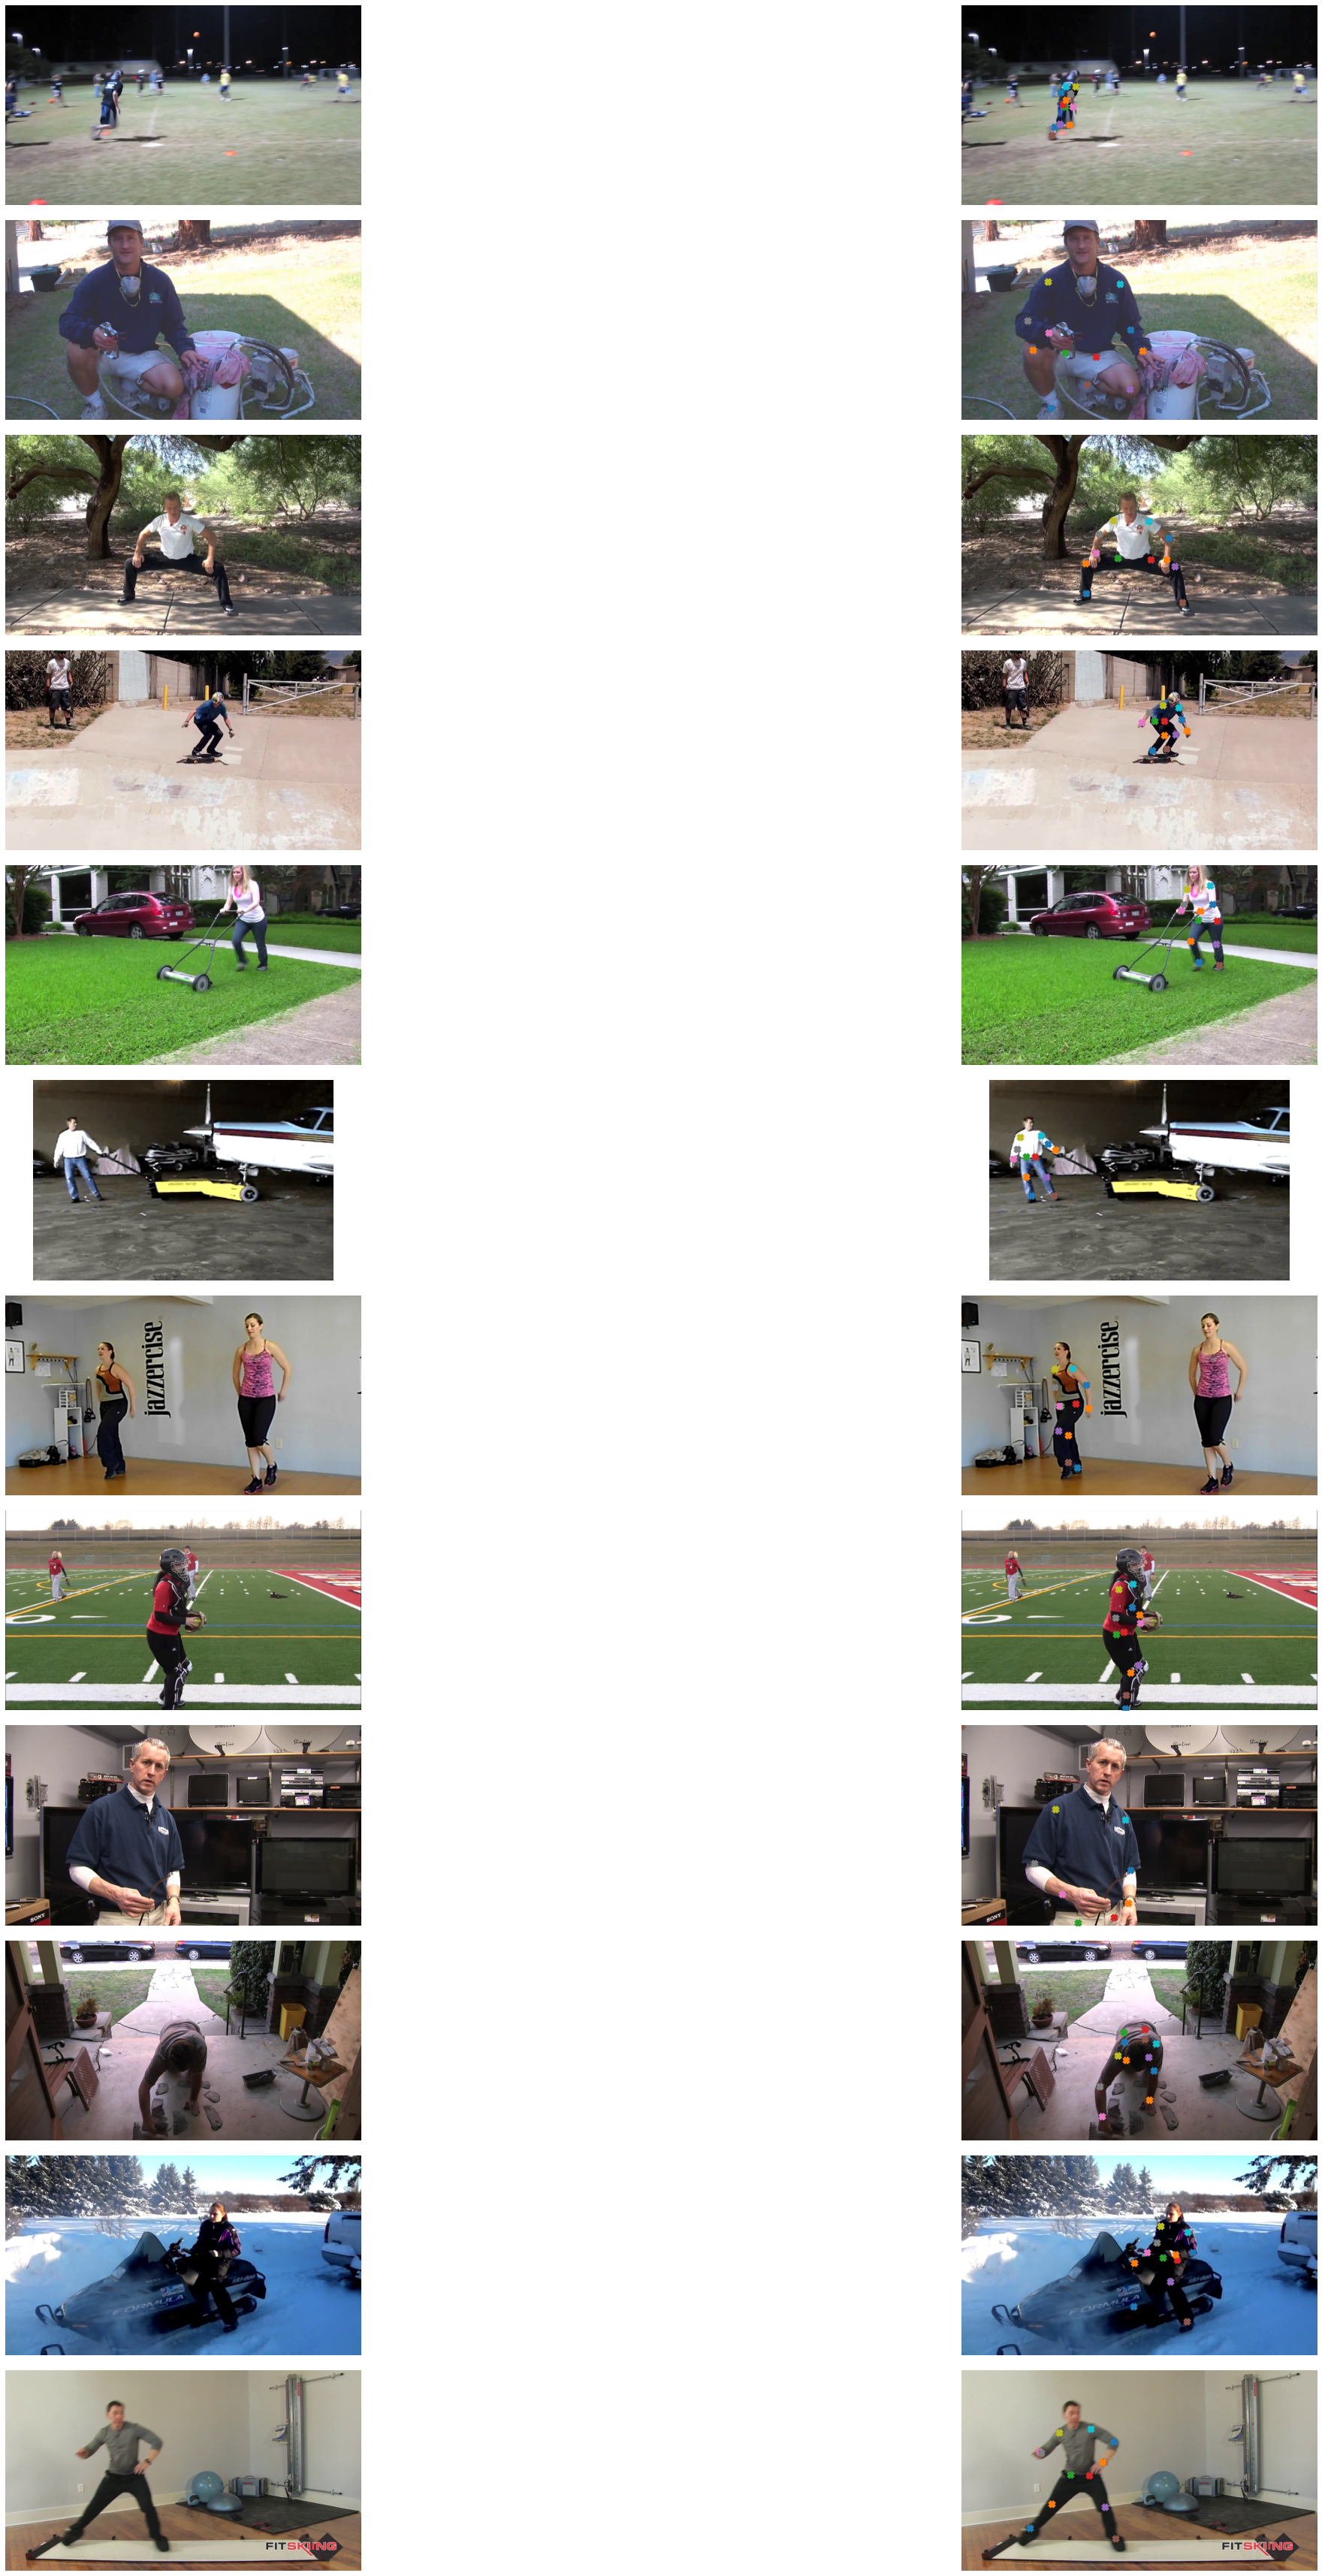

Valid(value=True, description='Success!')

In [4]:
# Lets you know if code was successful or not
try:
    # Parts of this code come from here:
    # https://github.com/benjiebob/StanfordExtra/blob/master/demo.ipynb
    def keypoints_visualization(images, keypoints):
        fig, axes = plt.subplots(nrows=len(images), ncols=2, figsize=(48, 48))
        [ax.axis("off") for ax in np.ravel(axes)]

        for (ax_orig, ax_all), image, current_keypoint in zip(axes, images, keypoints):
            ax_orig.imshow(image)
            ax_all.imshow(image)

            # If the keypoints were formed by `imgaug` then the coordinates need
            # to be iterated differently.
            if isinstance(current_keypoint, KeypointsOnImage):
                for idx, kp in enumerate(current_keypoint.keypoints):
                    ax_all.scatter([kp.x], [kp.y], marker="x", s=50, linewidths=5)
            else:
                current_keypoint = np.array(current_keypoint)
                current_keypoint = current_keypoint[:, :2]
                for idx, (x, y) in enumerate(current_keypoint):
                    ax_all.scatter([x], [y], marker="x", s=50, linewidths=5)

        plt.tight_layout(pad=2.0)
        plt.show()

    # Twelve samples are randomly selected to be displayed with annotations
    samples = list(JSON_dictionary.keys())
    num_samples = 12
    selected_samples = np.random.choice(samples, num_samples)

    # Gets image data and associates annotation data with iamge
    images, keypoints = [], []
    for sample in selected_samples:
        data = retrieve_current_image(sample)
        image = data["img_data"]
        keypoint = data["joint_self"]
        images.append(image)
        keypoints.append(keypoint)

    # Creates the visualization output shown below
    keypoints_visualization(images, keypoints)

# ============================================================= #
    success = widgets.Valid(
        value=True,
        description="Success!",
    )
    display(success)
except Exception as e:
    failure = widgets.Valid(
        value=False,
        description="Failure!",
    )
    display(failure)
    print(e)
# ============================================================= #

In [5]:
# Creates key points dataset by associating all annotations with their respective images
class KeyPointsDataset(keras.utils.Sequence):
    def __init__(self, image_keys, aug, batch_volume=batch_volume, train=True):
        self.image_keys = image_keys
        self.aug = aug
        self.batch_volume = batch_volume
        self.train = train
        self.on_epoch_end()

    def __len__(self):
        return math.ceil(len(self.image_keys) // self.batch_volume)

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.image_keys))
        if self.train:
            np.random.shuffle(self.indexes)

    def __getitem__(self, index):
        indexes = self.indexes[
            index * self.batch_volume : (index + 1) * self.batch_volume
        ]
        image_keys_temp = [self.image_keys[k] for k in indexes]
        (images, keypoints) = self.__data_generation(image_keys_temp)
        return (images, keypoints)

    def __data_generation(self, image_keys_temp):
        batch_images = np.empty(
            (self.batch_volume, image_size, image_size, 3), dtype="int"
        )
        batch_keypoints = np.empty(
            (self.batch_volume, 1, 1, keypoints_quantity), dtype="float32"
        )
        for i, key in enumerate(image_keys_temp):
            data = retrieve_current_image(key)
            current_keypoint = np.array(data["joint_self"])[:, :2]
            kps = []

            for j in range(0, len(current_keypoint)):
                kps.append(Keypoint(x=current_keypoint[j][0], y=current_keypoint[j][1]))

            # Puts keypoints on respective image
            current_image = data["img_data"]
            kps_obj = KeypointsOnImage(kps, shape=current_image.shape)

            (new_image, new_kps_obj) = self.aug(image=current_image, keypoints=kps_obj)
            batch_images[
                i,
            ] = new_image

            # Retrieves X & Y coordinates after necessary augmentation
            kp_temp = []
            for keypoint in new_kps_obj:
                kp_temp.append(np.nan_to_num(keypoint.x))
                kp_temp.append(np.nan_to_num(keypoint.y))
            
            # Reshapes the keypoints to the correct size for processing
            batch_keypoints[i,] = np.array(
                kp_temp
            ).reshape(1, 1, 12 * 2)

        # Scales the coordinates for the batch
        batch_keypoints = batch_keypoints / image_size
        
        # Returns images and keypoints
        return (batch_images, batch_keypoints)

In [6]:
# Resizes all images to pre-defined size for processing
train_resize = iaa.Sequential([iaa.Resize(image_size, interpolation="linear"),])
test_resize = iaa.Sequential([iaa.Resize(image_size, interpolation="linear")])

# Shuffles and randomly selects samples for validation and training
np.random.shuffle(samples)
train_keys, validation_keys = (
    samples[int(len(samples) * 0.5) :],
    samples[: int(len(samples) * 0.2)],
)

# Creates train and validation sets from keypoints
train_set = KeyPointsDataset(train_keys, train_resize)
validation_set = KeyPointsDataset(validation_keys, test_resize)
print(f"Total batches in training set: {len(train_set)}")
print(f"Total batches in validation set: {len(validation_set)}")

Total batches in training set: 1088
Total batches in validation set: 435


In [13]:
#   ,-.       _,---._ __  / \
#  /  )    .-'       `./ /   \
# (  (   ,'            `/    /|
#  \  `-"             \'\   / |
#   `.              ,  \ \ /  |
#    /`.          ,'-`----Y   |
#   (            ;        |   '
#   |  ,-.    ,-'  Connor |  /
#   |  | (   |   Contursi | /
#   )  |  \  `.___________|/
#   `--'   `--'
#     _________________________________________________________________
#      Layer (type)                Output Shape              Param #   
#     =================================================================
#      input_8 (InputLayer)        [(None, 160, 160, 3)]     0         

#      tf.math.truediv_3 (TFOpLamb  (None, 160, 160, 3)      0         
#      da)                                                             

#      tf.math.subtract_3 (TFOpLam  (None, 160, 160, 3)      0         
#      bda)                                                            

#      MobilenetV3small (Functiona  (None, 5, 5, 576)        939120    
#      l)                                                              

#      separable_conv2d_9 (Separab  (None, 5, 5, 32)         46688     
#      leConv2D)                                                       

#      dropout_6 (Dropout)         (None, 5, 5, 32)          0         

#      separable_conv2d_10 (Separa  (None, 5, 5, 64)         2912      
#      bleConv2D)                                                      

#      dropout_7 (Dropout)         (None, 5, 5, 64)          0         

#      separable_conv2d_11 (Separa  (None, 5, 5, 128)        9920      
#      bleConv2D)                                                      

#      dense_9 (Dense)             (None, 5, 5, 256)         33024     

#      dense_10 (Dense)            (None, 5, 5, 64)          16448     

#      dense_11 (Dense)            (None, 5, 5, 24)          1560      

#     =================================================================
#     Total params: 1,049,672
#     Trainable params: 110,552
#     Non-trainable params: 939,120
#     _________________________________________________________________

# Creates MobileNetV3-Small model
def get_model():
    
    # Load the pre-trained weights of MobileNetV3
    backbone = keras.applications.MobileNetV3Small(
        weights="imagenet", 
        include_top=False, 
        input_shape=(image_size, image_size, 3),
        include_preprocessing=True,
    )
    
    backbone.trainable = False # Freezes layer
    inputs = layers.Input((image_size, image_size, 3))

    x = keras.applications.mobilenet_v2.preprocess_input(inputs)
    x = backbone(x)
    x = layers.SeparableConv2D(
        32,
        kernel_size=7,
        strides=1,
        activation="relu",
        padding="same",
    )(x)

    x = layers.Dropout(0.3)(x)
    x = layers.SeparableConv2D(
        64,
        kernel_size=5,
        strides=1,
        activation="relu",
        padding="same",
    )(x)

    x = layers.Dropout(0.3)(x)
    x = layers.SeparableConv2D(
        128,
        kernel_size=5,
        strides=1,
        activation="relu",
        padding="same",
    )(x)
    x = layers.Dense(
        256,
        activation="relu",
    )(x)
    x = layers.Dense(
        64, 
        activation="relu",
    )(x)

    outputs = layers.Dense(
        keypoints_quantity,
        activation="sigmoid",
    )(x)

    return keras.Model(inputs, outputs, name="keypoints")

In [14]:
# Model summary output
get_model().summary()

Model: "keypoints"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 tf.math.truediv_3 (TFOpLamb  (None, 160, 160, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_3 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 MobilenetV3small (Functiona  (None, 5, 5, 576)        939120    
 l)                                                              
                                                                 
 separable_conv2d_9 (Separab  (None, 5, 5, 32)         46688     
 leConv2D)                                               

In [15]:
# Garbage collection to prevent too much memory usage
class ClearMemory(Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()
        k.clear_session()

In [18]:
# Compiles model and performs fit
model = get_model()

model.compile(
    loss="mse", 
    optimizer=keras.optimizers.Adam(1e-4), 
    run_eagerly=True, 
    metrics=['mae'] 
)

# Tensorflow memory bugs, seems to be an edge case that's causing an issue; not confirmed
model.fit(
    train_set,
    use_multiprocessing = False,
    validation_data=validation_set,
    validation_steps=(int(len(validation_keys) / batch_volume)),
    epochs=EPOCHS,
    steps_per_epoch=(int(len(train_keys) / batch_volume)),
    callbacks=ClearMemory(),
    workers = 1,
    verbose = 1
)

Epoch 1/25
 831/1088 [=====================>........] - ETA: 1:20 - loss: 0.0556 - mae: 0.1855

KeyboardInterrupt: 